In [1]:
import shift_detector
from shift_detector.detector import Detector
from shift_detector.checks.conditional_probabilities_check import ConditionalProbabilitiesCheck

In [2]:
import pandas as pd

df = pd.read_csv('./data/pokedex.csv')
df1 = df.head(360)
df2 = df.tail(721-360)

In [3]:
df1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Entry
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Bulbasaur can be seen napping in bright sunlig...
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,There is a bud on this Pokémon’s back. To supp...
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,There is a large flower on Venusaur’s back. Th...
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,The flame that burns at the tip of its tail is...
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Charmeleon mercilessly destroys its foes using...
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Charizard flies around the sky in search of po...
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Squirtle’s shell is not merely used for protec...
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,"Its tail is large and covered with a rich, thi..."
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,Blastoise has water spouts that protrude from ...
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,Perhaps because it would like to grow up\nquic...


In [4]:
df2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Entry
360,361,Snorunt,Ice,NaN,300,50,50,50,50,50,50,3,False,It feeds mainly on ice and snow. It’s only abl...
361,362,Glalie,Ice,NaN,480,80,80,80,80,80,80,3,False,It freezes its prey and chews them whole.\nHow...
362,363,Spheal,Ice,Water,290,70,40,50,55,50,25,3,False,Spheal always travels by rolling around on its...
363,364,Sealeo,Ice,Water,410,90,60,70,75,70,45,3,False,Sealeo often balances and rolls things on the ...
364,365,Walrein,Ice,Water,530,110,80,90,95,90,65,3,False,Walrein swims all over in frigid seawater whil...
365,366,Clamperl,Water,NaN,345,35,64,85,74,55,32,3,False,"Despite its appearance, it’s carnivorous. It\n..."
366,367,Huntail,Water,NaN,485,55,104,105,94,75,52,3,False,It’s not the strongest swimmer. It wags its ta...
367,368,Gorebyss,Water,NaN,485,55,84,105,114,75,52,3,False,The color of its body changes with the water\n...
368,369,Relicanth,Water,Rock,485,100,90,130,45,65,55,3,False,"Thought to have gone extinct, Relicanth was\ng..."
369,370,Luvdisc,Water,NaN,330,43,30,55,40,65,97,3,False,There was an era when it was overfished due to...


In [5]:
from shift_detector.utils.column_management import ColumnType
custom_column_types = {
    'Legendary': ColumnType.categorical,
    'Type 1': ColumnType.categorical,
    'Type 2': ColumnType.categorical,
    'Generation': ColumnType.categorical
}
detector = Detector(df1, df2, #**custom_column_types
                   )

Numerical columns: Speed, Generation, Defense, HP, Attack, Total, #, Sp. Atk, Sp. Def
Categorical columns: Legendary
Text columns: Type 1, Name, Type 2, Entry
Used columns: #, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, Entry


In [6]:
cp = ConditionalProbabilitiesCheck(min_support=0.01, min_confidence=0.1, rule_limit=10,
                                               min_delta_supports=0.10, min_delta_confidences=0.1)

In [7]:
import logging

detector.run(cp)

Executing ConditionalProbabilitiesCheck
- Executing ConditionalProbabilitiesPrecalculation
- Executing BinningPrecalculation


# OVERVIEW

Executed 1 checks


,Column,# Shifts detected,# Checks Executed
0,"(Generation, Legendary)",1,1


# DETAILS

## Conditional Probabilities

Examined Columns: [('Generation', 'Legendary')]
Shifted Columns: [('Generation', 'Legendary')]



### Attribute-value combinations exclusive to first data set

Support: 42%
[Generation: 1]

Support: 28%
[Generation: 2]

Support: 4%
[#_binned: (173.8, 188.2]]

Support: 4%
[#_binned: (130.6, 145.0]]

Support: 4%
[#_binned: (101.8, 116.2]]

Support: 4%
[#_binned: (58.6, 73.0]]

Support: 4%
[#_binned: (29.8, 44.2]]

Support: 4%
[#_binned: (0.28, 15.4], Legendary: False]

Support: 4%
[#_binned: (274.6, 289.0], Legendary: False]

Support: 4%
[#_binned: (317.8, 332.2], Legendary: False]



### Attribute-value combinations exclusive to second data set

Support: 43%
[Generation: 5]

Support: 30%
[Generation: 4]

Support: 20%
[Generation: 6]

Support: 4%
[#_binned: (533.8, 548.2]]

Support: 4%
[#_binned: (677.8, 692.2]]

Support: 4%
[#_binned: (605.8, 620.2]]

Support: 4%
[#_binned: (562.6, 577.0]]

Support: 4%
[#_binned: (389.8, 404.2]]

Support: 4%
[#_binned: (418.6, 433.0], Legendary: False]

Support: 4%
[#_binned: (461.8, 476.2], Legendary: False]



### Red rules

**Red rules exceed both min_delta_supports and min_delta_confidences.**

The first rule can be read as follows:


*If the condition holds that Generation=3 then the probability that Legendary=False is 100% in the first data set and 62% in the second data set.*
*The attribute-value combination Generation=3 appears in 30% of the tuples in the first data set and in 7% of the second data set.*
*The attribute-value combination Generation=3 and Legendary=False appears in 30% of the tuples in the first data set and in 4% of the second data set.*


Generation: 3 => Legendary: False [SLS: (30%, 7%), S: (30%, 4%), C: (100%, 62%)]

Legendary: False => Generation: 3 [SLS: (98%, 90%), S: (30%, 4%), C: (31%, 5%)]

Legendary: False => Generation: 5 [SLS: (98%, 90%), S: (0%, 40%), C: (0%, 45%)]

Legendary: False => Generation: 1 [SLS: (98%, 90%), S: (41%, 0%), C: (42%, 0%)]

Legendary: False => Generation: 4 [SLS: (98%, 90%), S: (0%, 27%), C: (0%, 30%)]

Legendary: False => Generation: 2 [SLS: (98%, 90%), S: (26%, 0%), C: (27%, 0%)]

Legendary: False => Generation: 6 [SLS: (98%, 90%), S: (0%, 18%), C: (0%, 20%)]



### Orange rules

**The following rules fall below min_delta_supports but exceed min_delta_confidences:**


HP_binned: (67.04, 72.12], Legendary: False => Generation: 3 [SLS: (9%, 9%), S: (5%, 0%), C: (58%, 3%)]

Defense_binned: (59.0, 63.5], Legendary: False => Generation: 3 [SLS: (8%, 8%), S: (4%, 0%), C: (53%, 4%)]

HP_binned: (56.88, 61.96], Legendary: False => Generation: 3 [SLS: (12%, 9%), S: (5%, 0%), C: (42%, 3%)]

Legendary: False, Sp. Def_binned: (57.8, 62.0] => Generation: 3 [SLS: (7%, 8%), S: (4%, 0%), C: (56%, 4%)]

Generation: 3, HP_binned: (46.72, 51.8] => Legendary: False [SLS: (4%, 1%), S: (4%, 0%), C: (100%, 50%)]

Legendary: False, Sp. Atk_binned: (47.44, 50.32] => Sp. Def_binned: (49.4, 53.6] [SLS: (7%, 5%), S: (3%, 0%), C: (50%, 6%)]

Legendary: False, Sp. Def_binned: (57.8, 62.0] => Sp. Atk_binned: (58.96, 61.84] [SLS: (7%, 8%), S: (3%, 0%), C: (48%, 4%)]

Sp. Def_binned: (108.2, 112.4] => Legendary: False [SLS: (2%, 1%), S: (2%, 0%), C: (100%, 33%)]

HP_binned: (46.72, 51.8], Legendary: False => Generation: 3 [SLS: (9%, 7%), S: (4%, 0%), C: (41%, 4%)]

Legendary: False

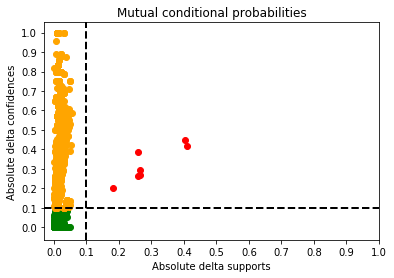

In [8]:
detector.evaluate()